In [29]:
# This cell imports necessary libraries for data manipulation, visualization, imputation, scaling, and encoding.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [30]:
# This cell loads the dataset from 'data.csv' into a pandas DataFrame named `df`.
df = pd.read_csv('train.csv')

In [31]:
# This cell displays a concise summary of the DataFrame, including data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
# inspectin shape of the data
df.shape

(1460, 81)

In [33]:
# This cell drops the 'Id' column from the DataFrame as it is not needed for analysis.
df.drop(columns='Id',inplace=True)

### Visualizing Missing Values

In [34]:
# This cell calculates the total number of missing values for each column and sorts them in descending order.
missingno = df.isnull().sum().sort_values(ascending=False)

In [35]:
# This cell filters out columns with no missing values, keeping only those with at least one missing entry.
missingno = missingno[missingno != 0]

Text(0.5, 0, 'No Missing Values')

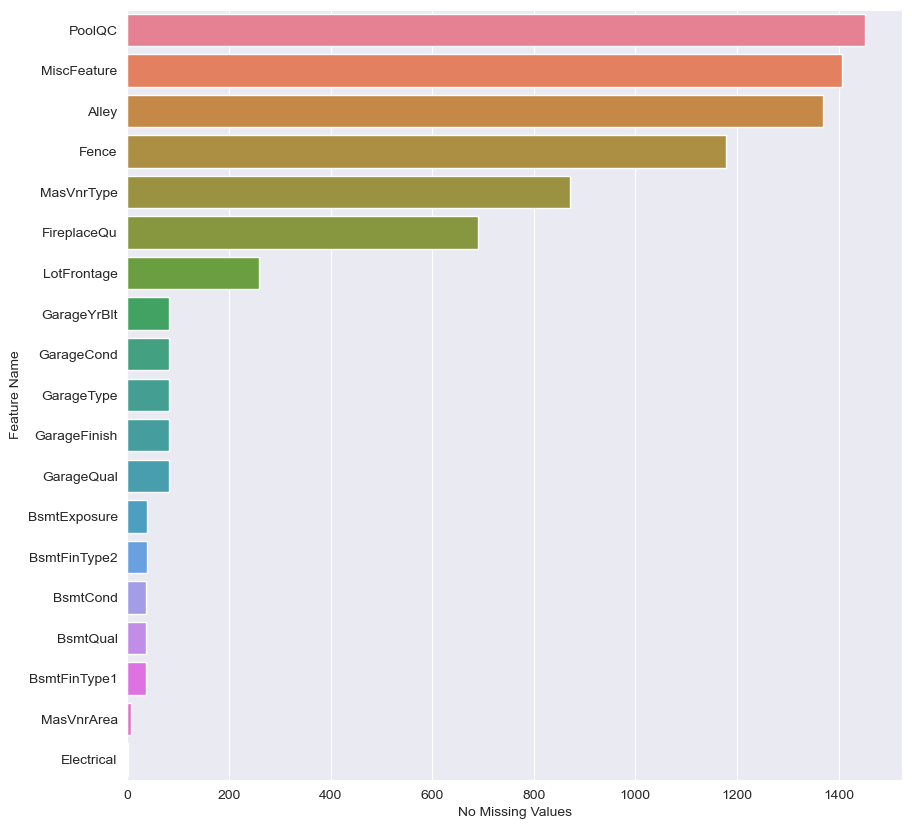

In [36]:
# This cell generates a bar plot to visualize the number of missing values for each feature.
plt.figure(figsize=(10,10))
bar = sns.barplot(x=missingno.values,y=missingno.index,hue=missingno.index)
bar.set_ylabel('Feature Name')
bar.set_xlabel('No Missing Values')

In [37]:
# This cell displays information about the columns that contain missing values.
df[missingno.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   MasVnrType    588 non-null    object 
 5   FireplaceQu   770 non-null    object 
 6   LotFrontage   1201 non-null   float64
 7   GarageYrBlt   1379 non-null   float64
 8   GarageCond    1379 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtFinType2  1422 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  BsmtFinType1  1423 non-null   object 
 17  MasVnrArea    1452 non-null   float64
 18  Electrical    1459 non-null 

In [38]:
# This cell checks for rows where any 'Garage' related feature has a missing value.
garage = df[[i for i in df.columns if 'Garage' in i]]
garage[garage.isnull().any(axis=1)].any()

GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
dtype: bool

In [39]:
# This cell checks for rows where all 'Garage' related features have non-missing values.
garage[~garage.isnull().any(axis=1)].any()

GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageCars      True
GarageArea      True
GarageQual      True
GarageCond      True
dtype: bool

Above Two Cells indicaties that all the missing values in Features on garage are the reason of absence of garage.

In [40]:
# This cell identifies and displays rows in 'Bsmt' (Basement) related features where there are missing values and at least one object column in that row is not null.
bsmt = df[[i for i in df.columns if 'Bsmt' in i]]
bsmt_null = bsmt[bsmt.isnull().any(axis=1)]
bsmt_null[bsmt_null.select_dtypes('object').notnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0


In [41]:
# This cell displays information about the 'Bsmt' (Basement) related features that contain missing values.
bsmt_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 17 to 1412
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      2 non-null      object
 1   BsmtCond      2 non-null      object
 2   BsmtExposure  1 non-null      object
 3   BsmtFinType1  2 non-null      object
 4   BsmtFinSF1    39 non-null     int64 
 5   BsmtFinType2  1 non-null      object
 6   BsmtFinSF2    39 non-null     int64 
 7   BsmtUnfSF     39 non-null     int64 
 8   TotalBsmtSF   39 non-null     int64 
 9   BsmtFullBath  39 non-null     int64 
 10  BsmtHalfBath  39 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 3.7+ KB


The Full (with 39 not-null) Features are filled with zero except 2 of them. Where in one case where other values are present but `BsmtExposure` and `BsmtFinType2` are null and most probably the reason is absence of the house feature along with all other null values.

In [42]:
# This cell investigates 'MasVnr' (Masonry Veneer) related features, specifically identifying cases where `MasVnrType` is null but `MasVnrArea` is not zero or null.
vnr = df[[col for col in df.columns if 'Vnr' in col]]
vnr_null = vnr[vnr.MasVnrType.isnull()]
vnr_null[(vnr_null.MasVnrArea != 0) & (vnr_null.MasVnrArea.notna())]

,MasVnrType,MasVnrArea
624,NaN,288.0
773,NaN,1.0
1230,NaN,1.0
1300,NaN,344.0
1334,NaN,312.0


Wherever `MasVnType` in NaN `MasVnArea` is also 0 except 5 observation. It is safe to assume that all the null values are because of absence of the house feature and we will ignore the little anomaly.

In [43]:
# This cell analyzes the 'Electrical' feature by printing its value counts, the mean 'SalePrice' per electrical type, and rows with missing 'Electrical' values.
print(df.Electrical.value_counts())
print(df.groupby('Electrical')['SalePrice'].mean())
df[df.Electrical.isnull()]

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


The missing one electrical may have been the most common one because it has a price close to  most common category.


|  Feature         |    Missing Reason       | Treatment    |
|------------------|-------------------------|--------------|
|PoolQC            | Absence of House Feature|Fill with 'NA'|
|MiscFeature       | Absence of House Feature|Fill with 'NA'|
|Alley             | Absence of House Feature|Fill with 'NA'|
|Fence             | Absence of House Feature|Fill with 'NA'|
|MasVnrType        | Absence of House Feature|Fill with 'NA'|               
|FireplaceQu       | Absence of House Feature|Fill with 'NA'| 
|LotFrontage       | Absence of House Feature|Fill with 0   |
|GarageYrBlt       | Absence of House Feature|Fill with 0   |
|GarageCond        | Absence of House Feature|Fill with 'NA'|
|GarageFinish      | Absence of House Feature|Fill with 'NA'|
|GarageQual        | Absence of House Feature|Fill with 'NA'|
|GarageType        | Absence of House Feature|Fill with 'NA'|
|BsmtExposure      | Absence of House Feature|Fill with 'NA'|
|BsmtFinType2      | Absence of House Feature|Fill with 'NA'|
|BsmtQual          | Absence of House Feature|Fill with 'NA'|
|BsmtFinType1      | Absence of House Feature|Fill with 'NA'|
|BsmtCond          | Absence of House Feature|Fill with 'NA'|
|MasVnrArea        | Absence of House Feature|Fill with 0   |           
|Electrical        | Unknown                 |Mode imputation|

In [44]:
# This cell defines a list `mode_imp` containing the column(s) to be imputed using the mode strategy.
mode_imp = ['Electrical']

In [45]:
# This cell identifies categorical columns from the missing features that will be imputed with 'NA'.
na_imp = df[missingno.index].select_dtypes('object').columns.drop(mode_imp)
na_imp

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1'],
      dtype='object')

In [46]:
# This cell identifies numerical columns from the missing features that will be imputed with zero.
zero_imp = df[missingno.index].select_dtypes('number').columns
zero_imp

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')

In [47]:
# This cell constructs a `ColumnTransformer` to handle different imputation strategies for various features.
impute = ColumnTransformer([
    ('na_imp',SimpleImputer(strategy='constant',fill_value='NA'), na_imp),
    ('zero_imp',SimpleImputer(strategy='constant',fill_value=0), zero_imp),
    ('mode_imp',SimpleImputer(strategy='most_frequent'), mode_imp)
    ], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

df = impute.fit_transform(df)

### Ordianl Encoding

In [59]:
ord_feat = ['LotShape','Utilities','LandSlope','BldgType','ExterQual','ExterCond',
            'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','Electrical','KitchenQual','FireplaceQu','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
num_feat = df.select_dtypes('number').columns
bi_feat=['CentralAir']
cat_feat = df.columns.drop([*ord_feat,*num_feat,*bi_feat])

In [23]:
# This cell defines a dictionary `ord_dic` to map ordinal features to their ordered categories.
ord_dic = dict(
    LotShape = ['NA','Reg', 'IR1', 'IR2', 'IR3'],
    Utilities =['NA','AllPub', 'NoSeWr','NoSeWa','ELO'],
    LandSlope =['NA','Gtl', 'Mod', 'Sev'],
    BldgType =['NA','1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
    BsmtExposure = ['NA','No', 'Gd','Av','Mn'],
    BsmtFinType1 = ['NA','GLQ', 'ALQ', 'BLQ',  'Rec', 'LwQ','Unf',],
    BsmtFinType2 = ['NA','GLQ', 'ALQ', 'BLQ',  'Rec', 'LwQ','Unf',],
    GarageFinish = ['NA','Fin','RFn','Unf'],
    PavedDrive = ['NA','Y', 'N', 'P'],
    Fence = ['NA','MnPrv', 'GdWo', 'GdPrv', 'MnWw'],
    Electrical = ['NA','SBrkr','FuseA','FuseF','FuseP','Mix'],
    rest =['NA','Ex','Gd','TA', 'Fa','Po']
)


In [25]:
# This cell prepares the ordinal features for encoding by selecting them into `df_ord`
# and creating a list of ordered categories based on the `ord_dic`.
df_ord = df[ord_feat]
categories = [ord_dic[col] if col in ord_dic.keys() else ord_dic['rest'] for col in ord_feat]

In [27]:
# This cell applies OrdinalEncoder to the ordinal features (`ord_feat`) using a ColumnTransformer (`ct`).
ct = ColumnTransformer([
    ('oe',
     OrdinalEncoder(
         categories = categories,
         handle_unknown='use_encoded_value',
         unknown_value=-1,
     ),
     ord_feat)],
    remainder='passthrough',
    verbose_feature_names_out=False).set_output(transform='pandas')
df = ct.fit_transform(df)

In [28]:
# This cell updates the `num_ord_feat` list by removing categorical features, keeping only numerical and ordinal encoded features.
num_ord_feat = df.columns.drop(cat_feat)

<Figure size 2000x2000 with 0 Axes>

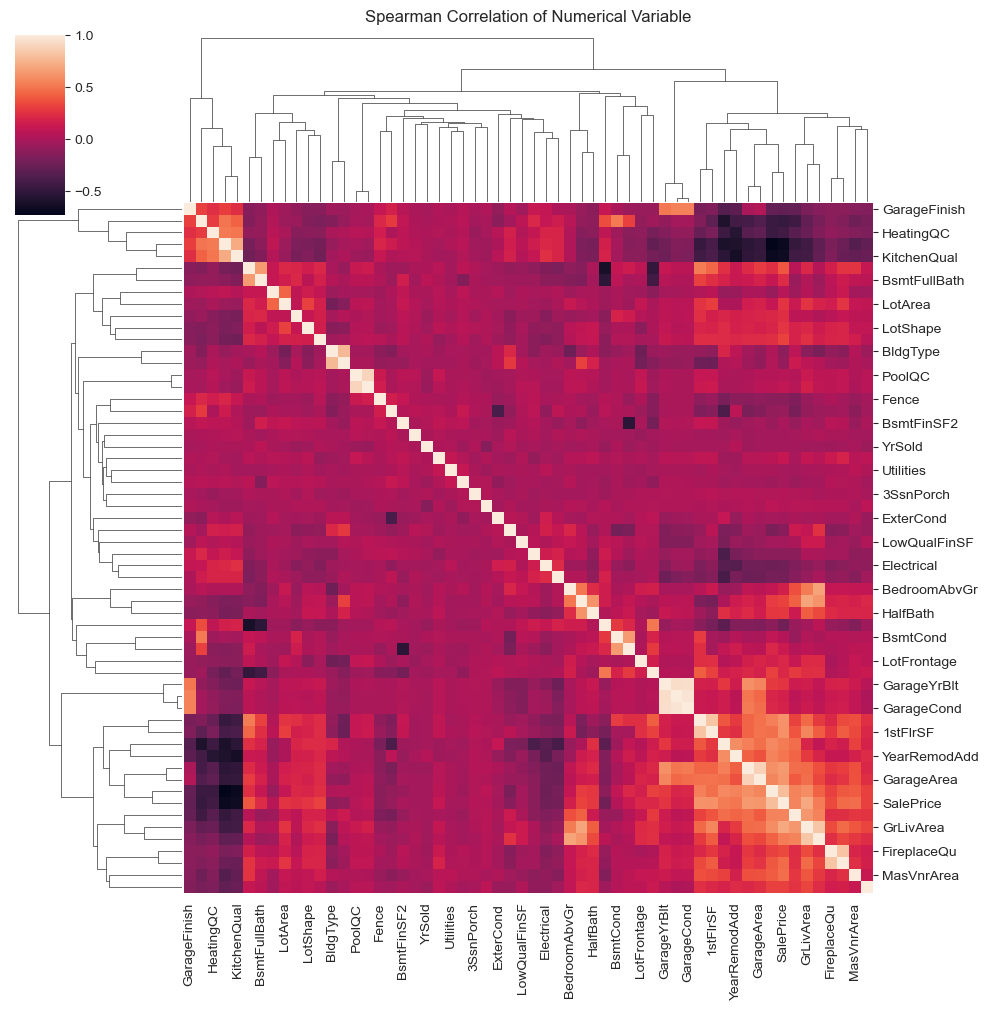

In [29]:
# This cell visualizes the Spearman correlation of numerical and ordinal features using a clustermap.
plt.figure(figsize=(20,20))
clst = sns.clustermap(df[num_ord_feat].corr('pearson'))
clst.ax_col_dendrogram.set_title('Spearman Correlation of Numerical Variable')
plt.show()

In [30]:
# This cell defines a function `cramersv_corr` to calculate Cramer's V correlation for categorical variables.
def cramersv_corr(df):

    from scipy.stats import chi2_contingency

    df = df.astype('object')
    df = df.fillna('None')
    cols = df.columns
    corr = pd.DataFrame(columns=cols,index=cols)
    for i in range(len(df.columns)):
        for j in range(i,len(cols)):
            col1 = cols[i]
            col2 = cols[j]
            contingency_table = pd.crosstab(df[col1],df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape) - 1
            cramersv = np.sqrt(chi2 / (n * min_dim))
            corr.loc[cols[i],cols[j]]=corr.loc[cols[j],cols[i]] = cramersv
    return corr.astype('float')

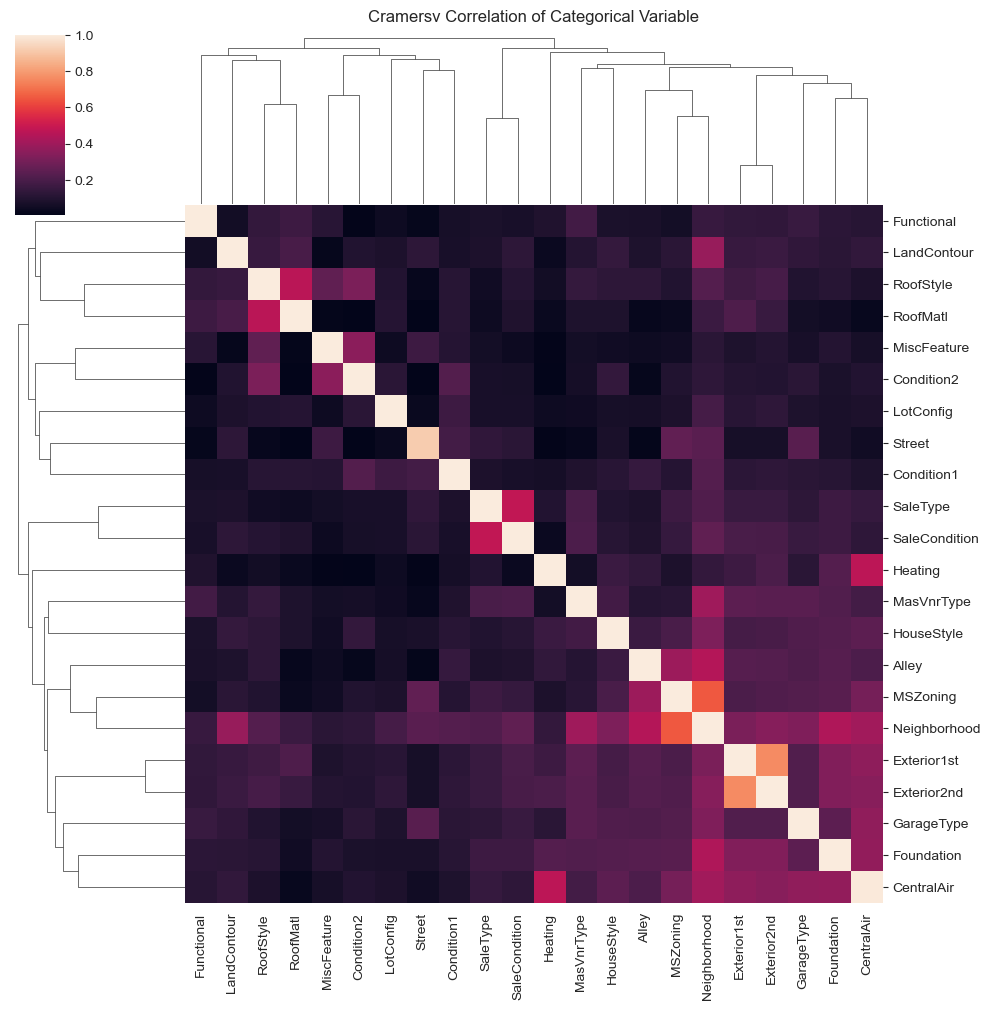

In [31]:
# This cell visulaize the Cramer's V correlaiton using a cluseter map
clst = sns.clustermap(cramersv_corr(df[cat_feat]))
clst.ax_col_dendrogram.set_title('Cramersv Correlation of Categorical Variable')
plt.show()

In [32]:
# This cell standardizes numerical and ordian features for visualization
standardized = StandardScaler().set_output(transform='pandas').fit_transform(df[num_ord_feat])

Text(0.5, 1.0, 'Visualizing Outliers')

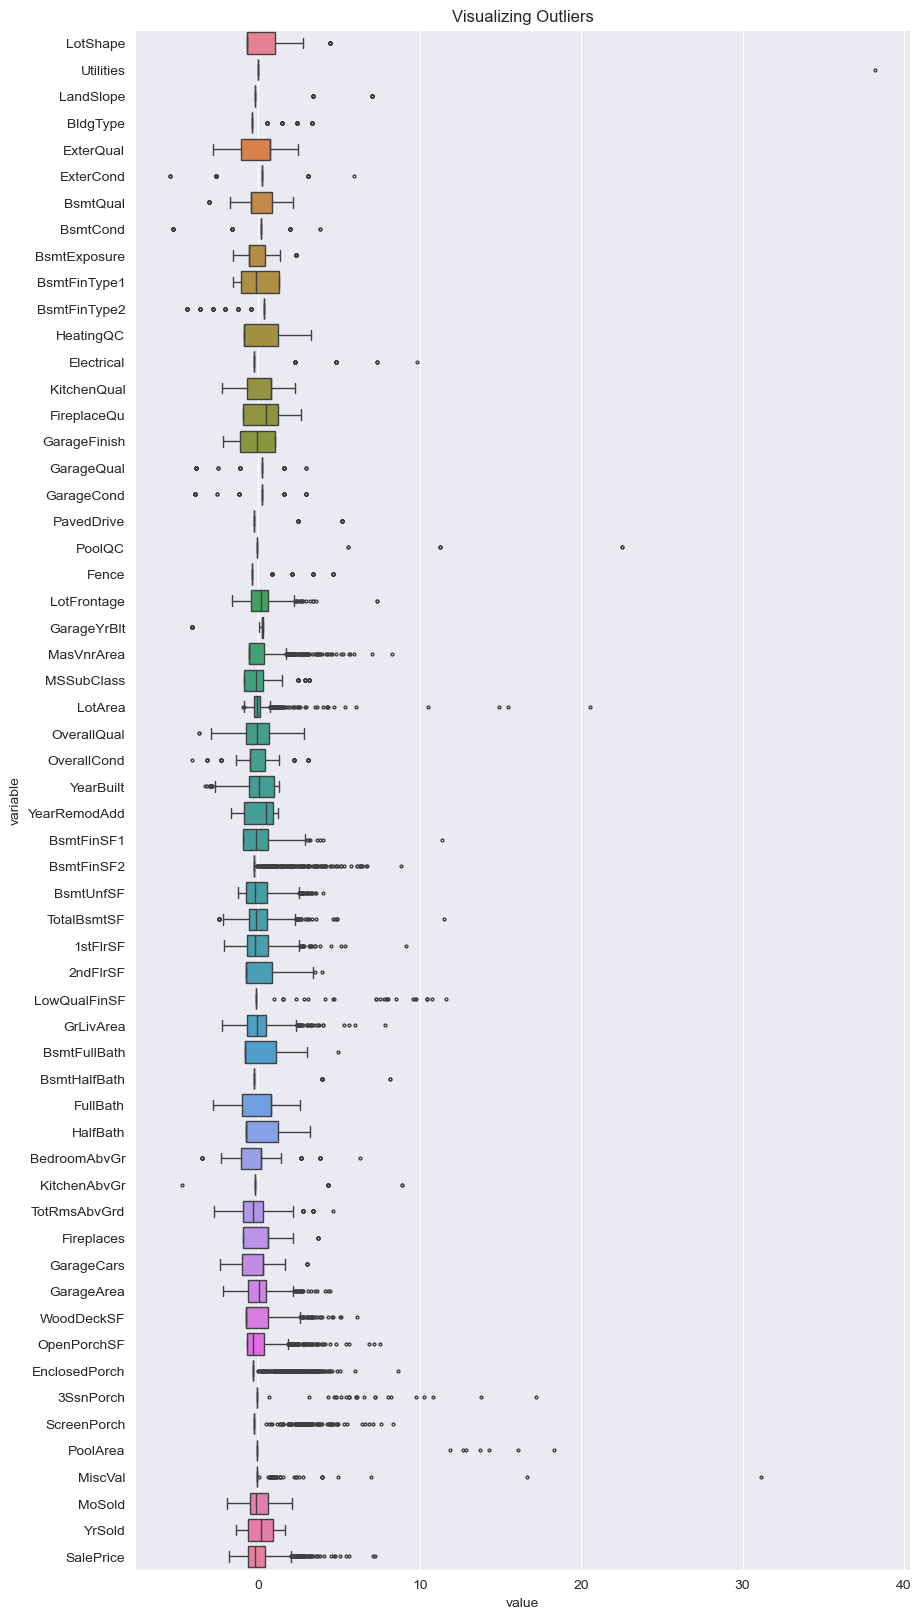

In [33]:
# This cell visualizes the distribution of numerical and ordinal features useing boxplots
melt = standardized.melt(value_vars=num_ord_feat)
plt.figure(figsize=(10,20))
box= sns.boxplot(melt,x='value',y='variable',fliersize=2,hue='variable')
box.set_title('Visualizing Outliers')

Most of the features are left skewed

In [34]:
# This function performs D'Agostino and Pearson's normal test using skewness and curtosis for the numerical and ordinal features
def feat_normaltest(df,ci=0.05):

    from scipy.stats import normaltest
    
    df = df.select_dtypes('number')
    normal_test = normaltest(df,axis=0, nan_policy='omit')
    test_results = pd.DataFrame({'columns':df.columns,
                                 'test_statistic':normal_test.statistic,
                                 'pvalue':normal_test.pvalue,
                                 'result':['normal' if pval >= ci else 'not-normal' for pval in normal_test.pvalue]})
    def row_color(row):
        green = 'background-color:#75ff86'
        red = 'background-color:#ff7575'
        return [green if row['result'] == 'normal' else red for _ in row]
    styled_df = test_results.style.apply(row_color,axis=1)
    styled_df.set_table_styles([{'selector':'th.col_heading',
                                            'props':'background-color:#EAEAEA;'}])
    return styled_df

In [35]:
# This cell shows the normality of all the numerical and ordinal feature
feat_normaltest(df[num_ord_feat])

,columns,test_statistic,pvalue,result
0,LotShape,319.240552,0.000000,not-normal
1,Utilities,4251.908286,0.000000,not-normal
2,LandSlope,1415.290385,0.000000,not-normal
3,BldgType,609.526236,0.000000,not-normal
4,ExterQual,130.138880,0.000000,not-normal
5,ExterCond,474.628842,0.000000,not-normal
6,BsmtQual,126.005120,0.000000,not-normal
7,BsmtCond,1164.531220,0.000000,not-normal
8,BsmtExposure,211.264858,0.000000,not-normal
9,BsmtFinType1,8406.229413,0.000000,not-normal


None of the featrues are normally distributed

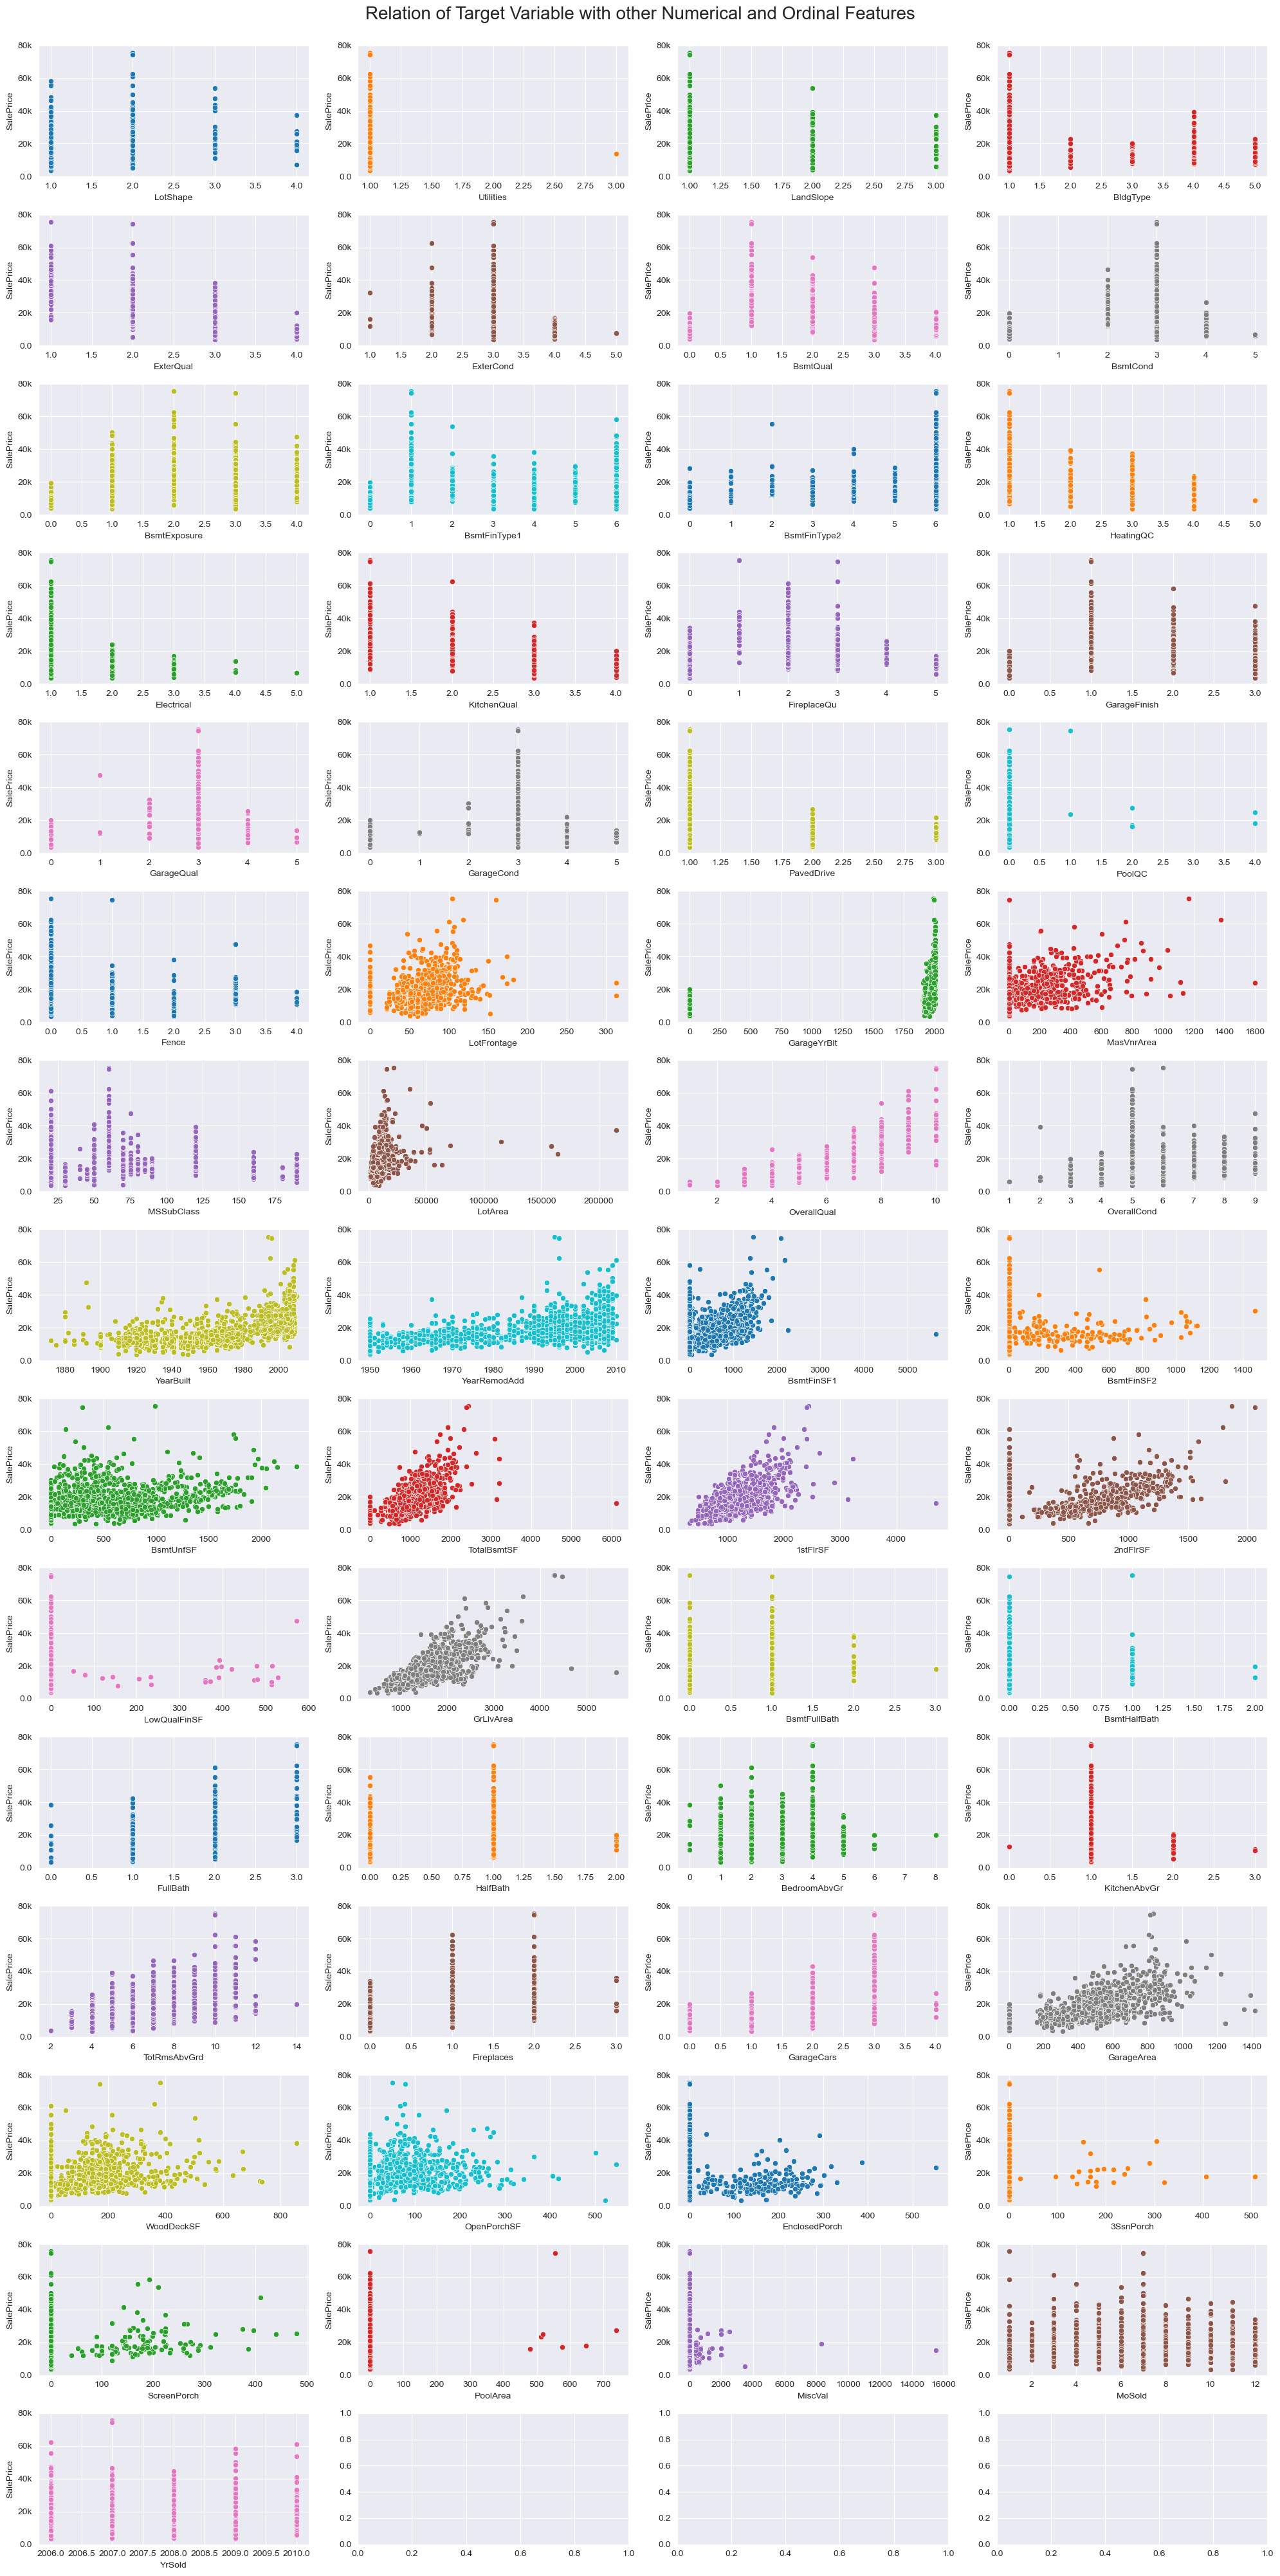

In [36]:
# This cell shows the relation of target variable and numerical and ordinal variables
fig, axes = plt.subplots(15,4,figsize=(20,40))

axes = axes.flatten()

num_predictors = df[num_ord_feat].columns.drop('SalePrice')
colors = sns.color_palette(n_colors=len(num_predictors))
for i in range(len(num_predictors)):
    ax = axes[i]
    sns.scatterplot(data=df,y='SalePrice',x=num_predictors[i],ax=ax,color=colors[i])
    ax.set_ylim([0,800000])
    new_ticks = np.char.replace(ax.get_yticks().astype(str),'0000.0','k')
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(new_ticks)
plt.suptitle('Relation of Target Variable with other Numerical and Ordinal Features',y=1,fontsize=20)
plt.tight_layout()
plt.show()

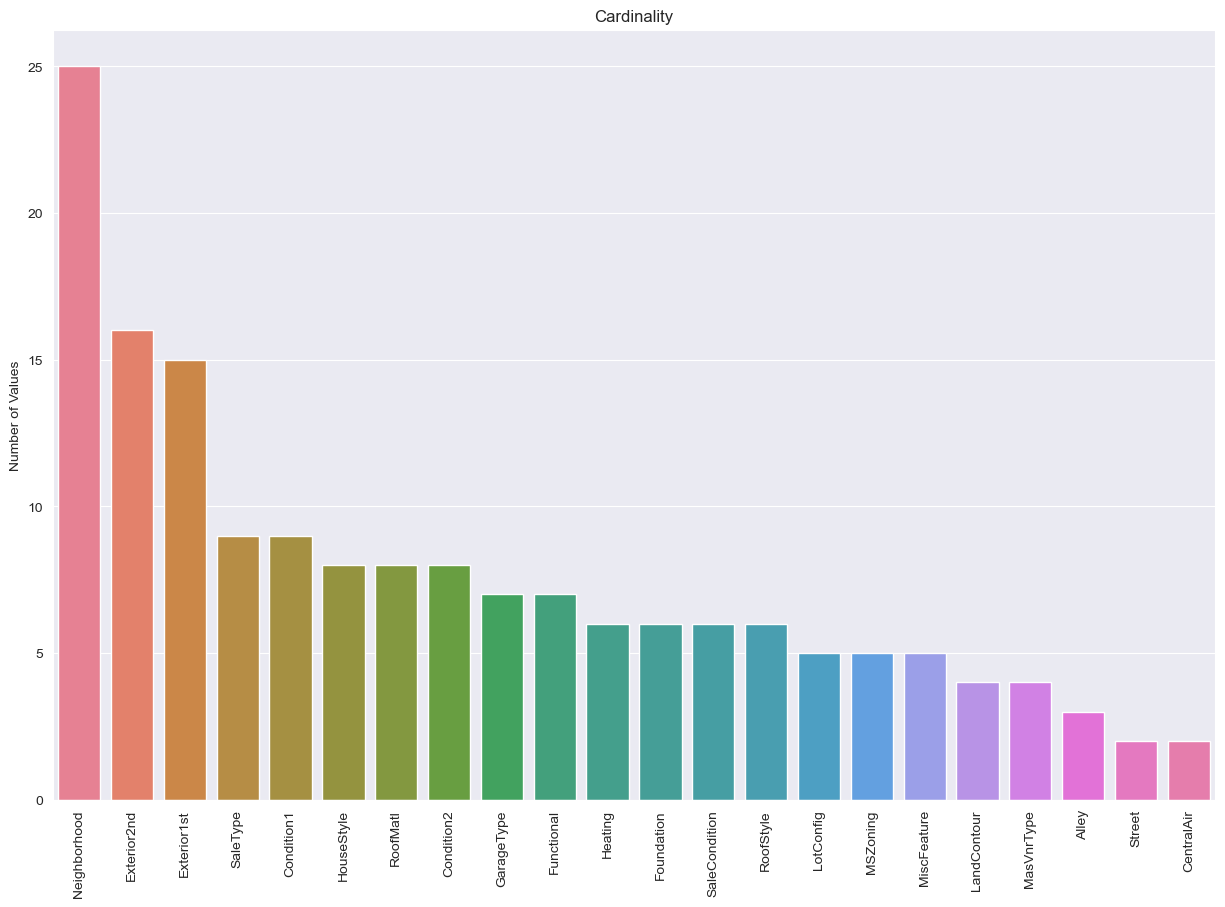

In [37]:
# This cell shows the cardianlity of the all the categorical features
plt.figure(figsize=(15,10))
cardinality = df[cat_feat].nunique().sort_values(ascending=False)
bar = sns.barplot(y=cardinality.values,x=cardinality.index,hue=cardinality.index)
bar.set_xticks(bar.get_xticks(),bar.get_xticklabels(),rotation=90)
bar.set_ylabel('Number of Values')
bar.set_xlabel('')
plt.title('Cardinality')
plt.show()

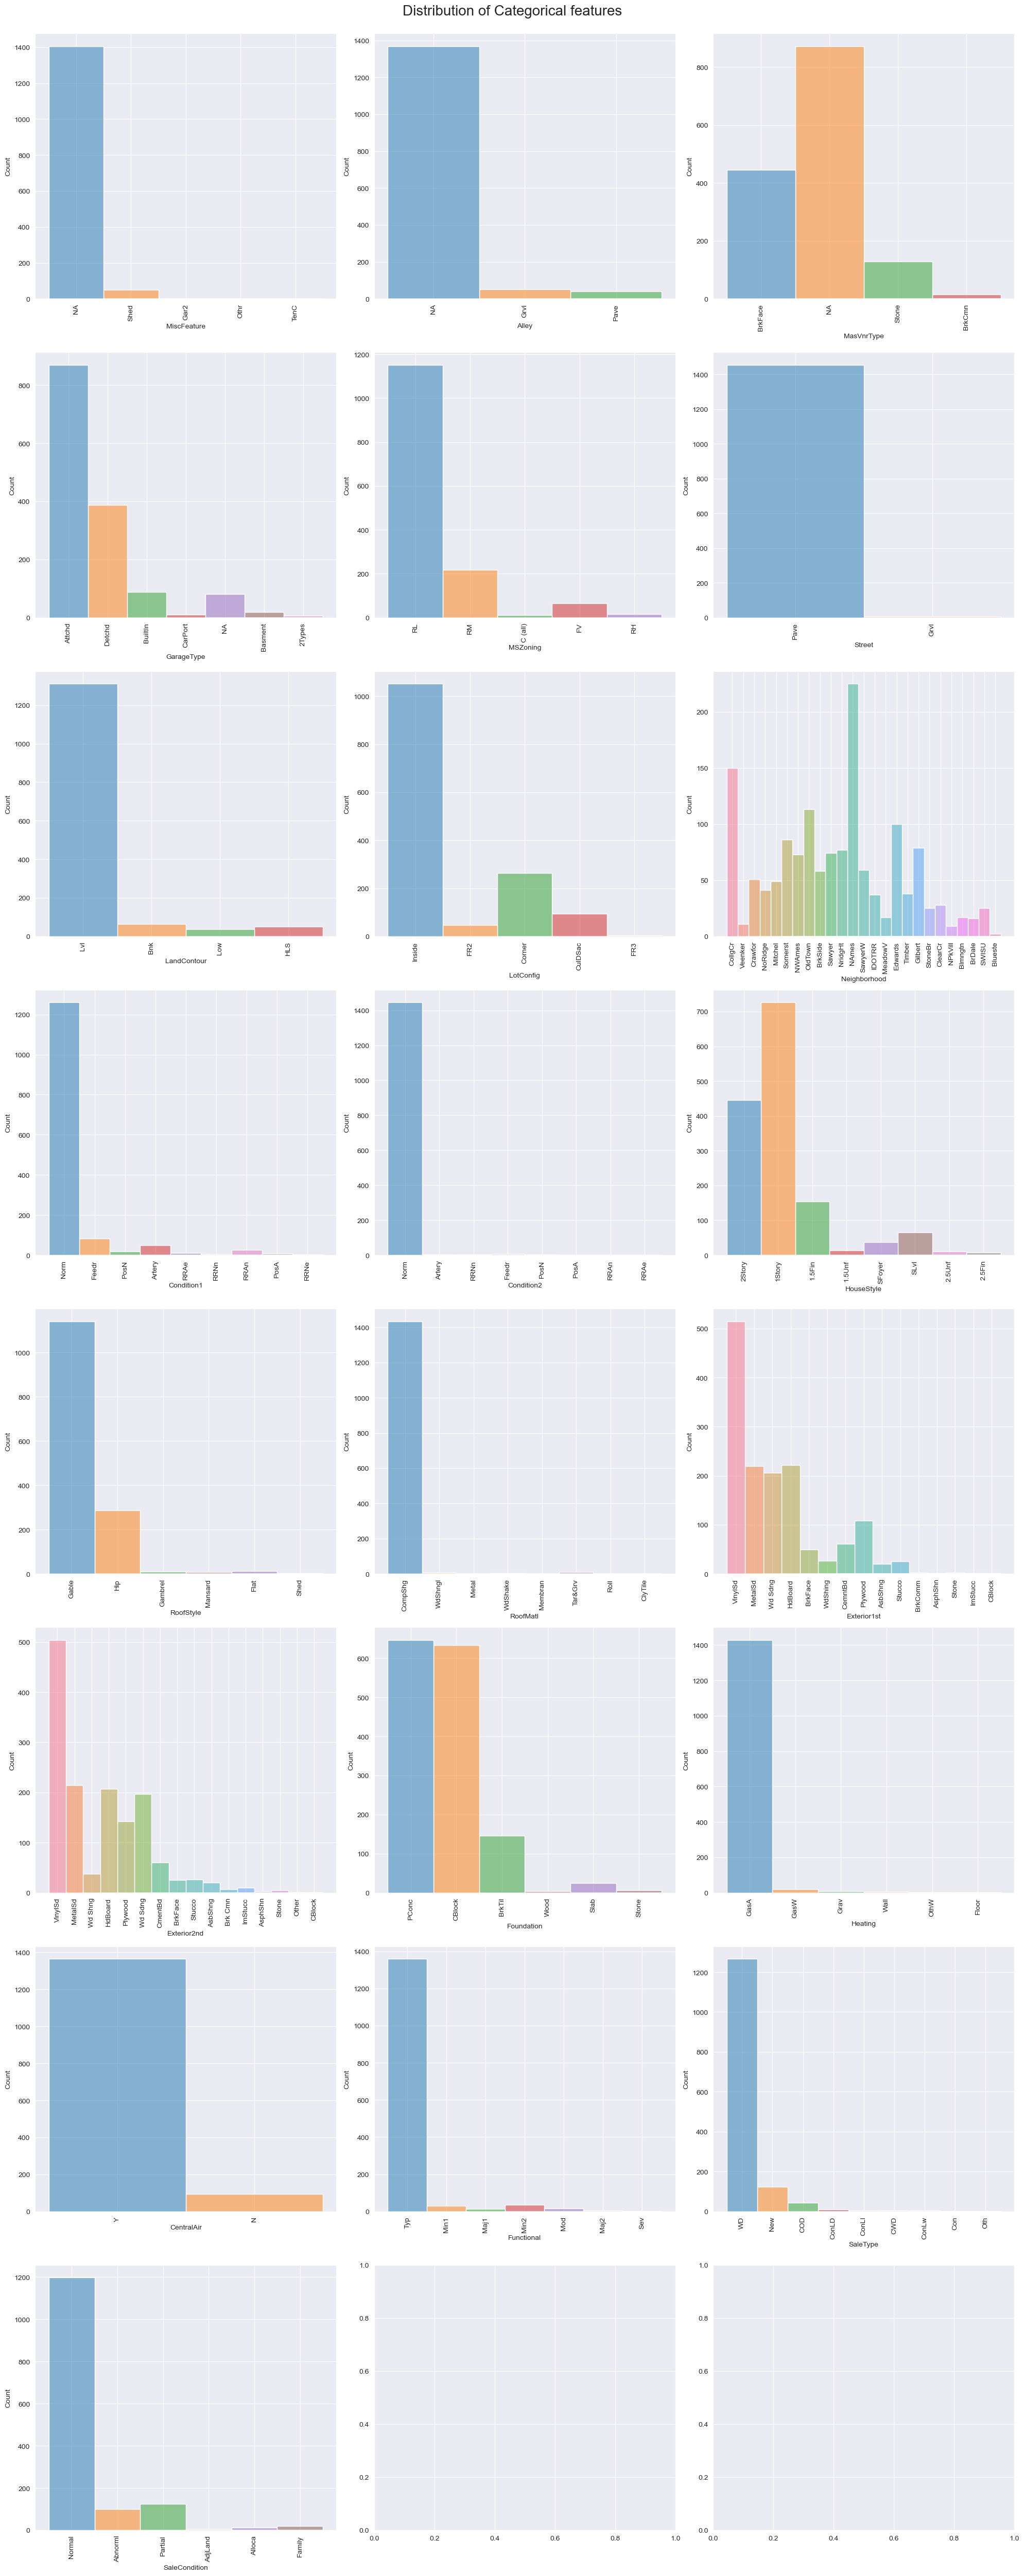

In [38]:
# Thsi cell shows the distribution of categorical features through bar graphs
fig, axes = plt.subplots(8,3,figsize=(20,50))

axes = axes.flatten()

for i in range(len(cat_feat)):
    ax = axes[i]
    sns.histplot(data=df,x=cat_feat[i],ax=ax,hue=cat_feat[i])
    ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),rotation=90)
    ax.get_legend().remove()
plt.suptitle('Distribution of Categorical features',y=1,fontsize=20)
plt.tight_layout()

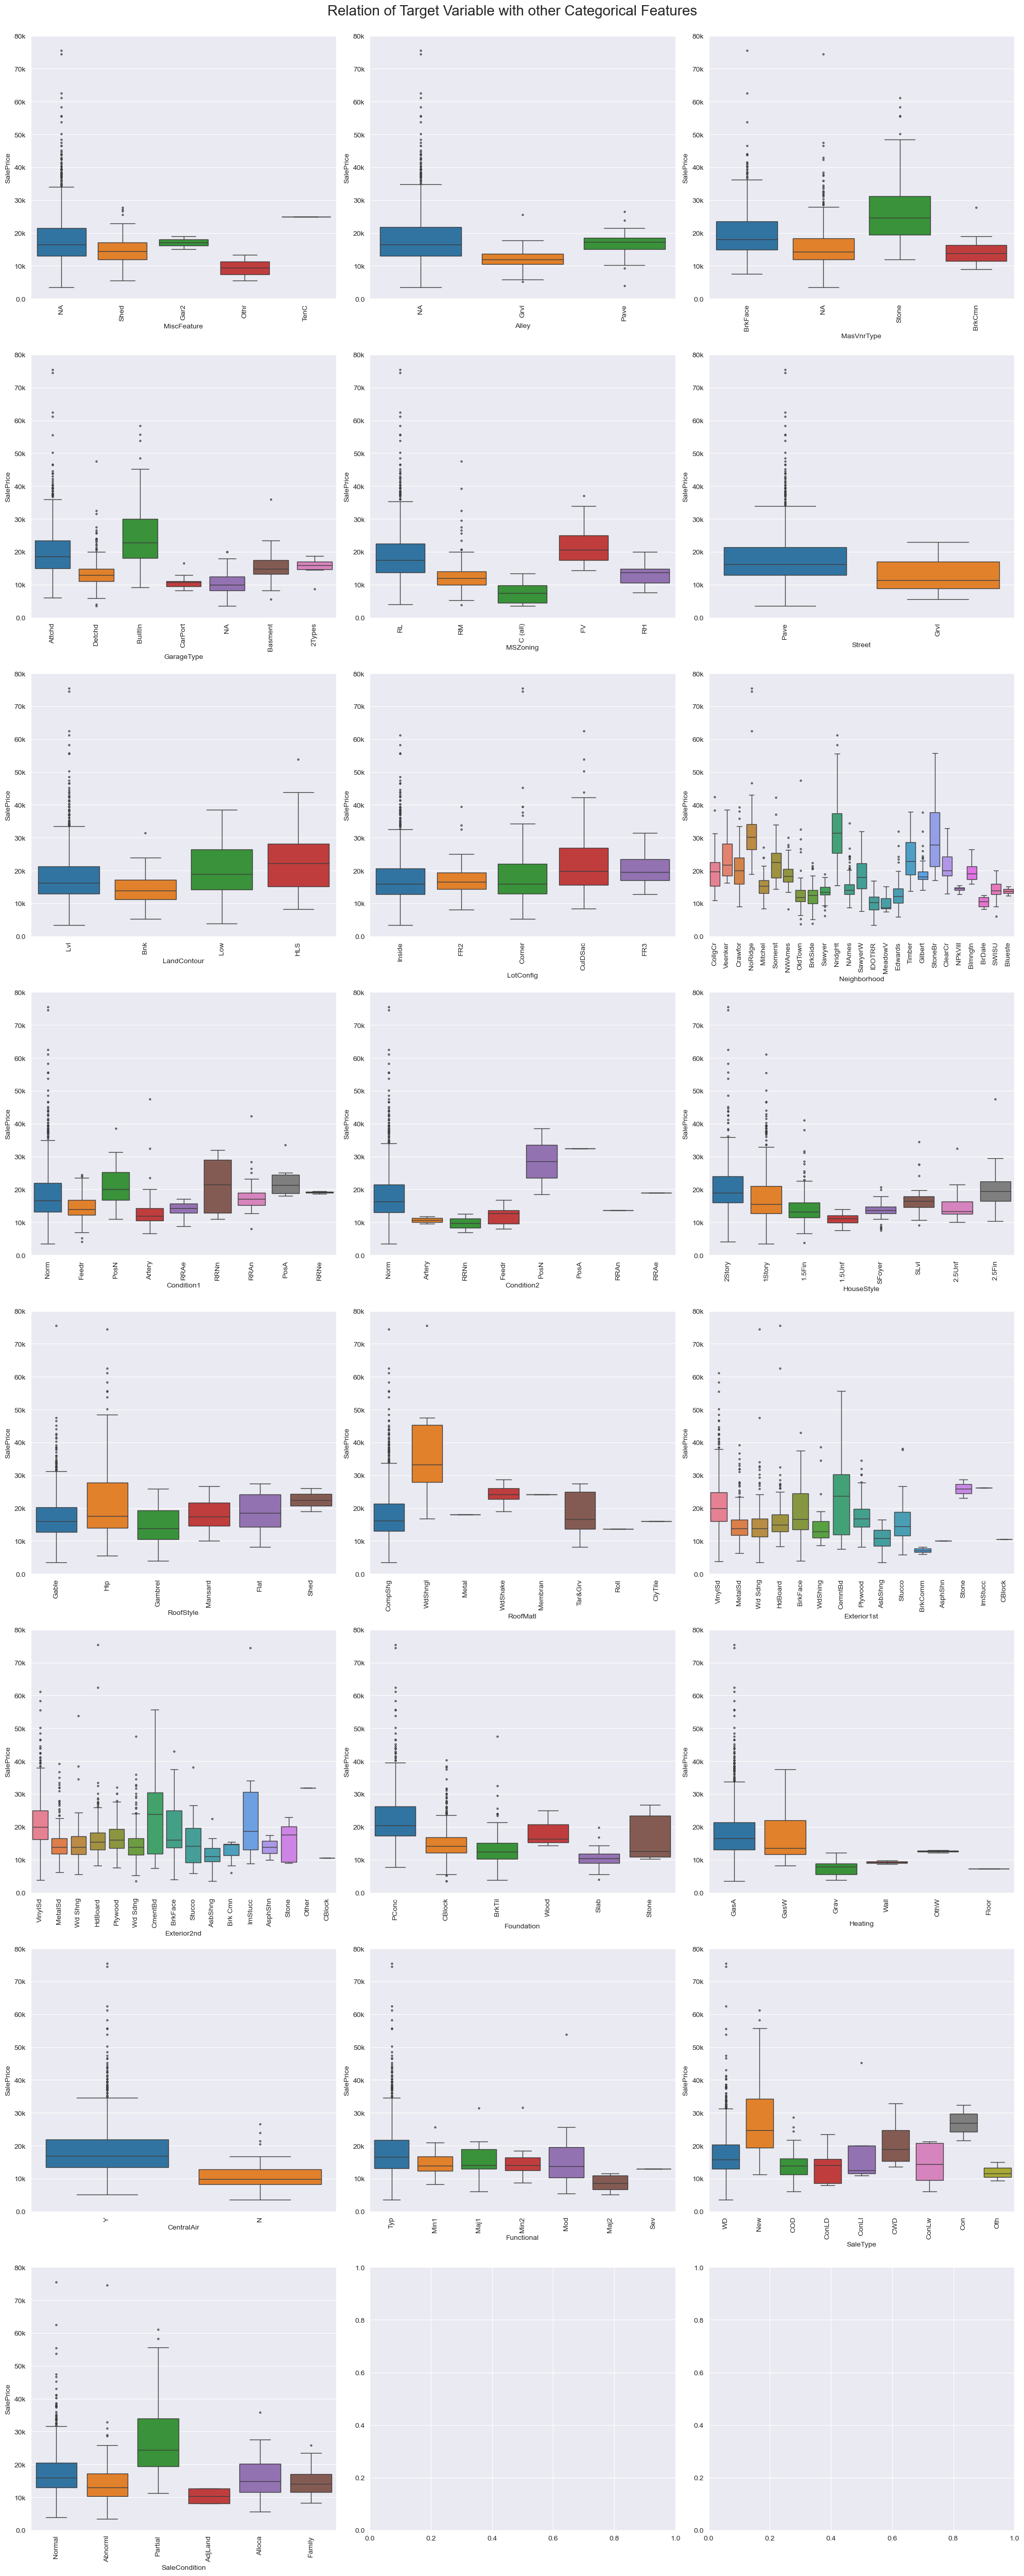

In [39]:
# This cell shows relation between categorical features and target features

fig, axes = plt.subplots(8,3,figsize=(20,50))

axes = axes.flatten()

for i in range(len(cat_feat)):
    ax = axes[i]
    sns.boxplot(data=df,y='SalePrice',x=cat_feat[i],ax=ax,fliersize=2,hue=cat_feat[i])
    ax.set_ylim([0,800000])
    new_ticks = np.char.replace(ax.get_yticks().astype(str),'0000.0','k')
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(new_ticks)
    ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),rotation=90)
    if ax.get_legend():
        ax.get_legend().remove()
plt.suptitle('Relation of Target Variable with other Categorical Features',y=1,fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'Target Variable (SalePrice) Distribution')

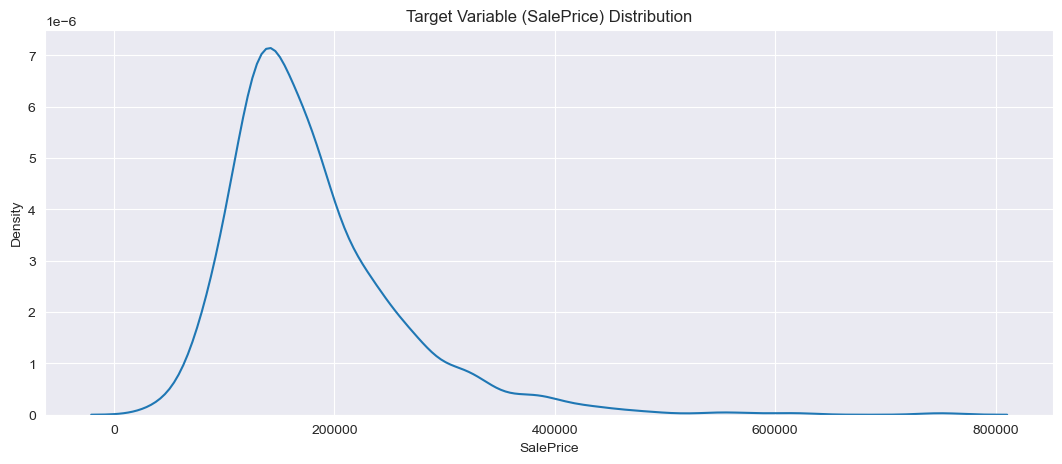

In [40]:
# This cell shows the distribution of target varibale thorugh a density plot
plt.figure(figsize=(13,5))
kde = sns.kdeplot(df.SalePrice)
kde.set_title('Target Variable (SalePrice) Distribution')

### Key Findings:

**Target Variable Skewness:** The density plot of the target variable (house price) shows a distribution that is positively skewed (skewed to the right). This is a common finding with price data and suggests that most houses are clustered at a lower price point, with a long tail of more expensive properties. This skew will need to be corrected (e.g., with a log transformation) for many modeling algorithms.

**Data Types & Structure:** The dataset is composed of a heterogeneous mix of features. It contains both numerical data (like lot size or square footage) and categorical data (like neighborhood or building type). This finding means that a preprocessing pipeline must treat these two types of columns differently.

**Presence of Missing Data:** The analysis pipeline indicates the presence of missing (null) values within the dataset. This finding necessitates an imputation strategy (e.g., filling with the mean, median, or a constant) to ensure the dataset is complete before training a model.

These findings (skewness, mixed data types, and missing values) are the primary outcomes of the EDA and directly inform the data preprocessing steps required to build a reliable model.